In [329]:
# general purpose modules for handling data
import numpy as np
import pandas as pd

# for loading telo data column containing individual telomere length values
from ast import literal_eval

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# custom module for handling telomere length data
import telomere_methods_astros as telo_ma

# statistics
import scipy.stats as stats
import scikit_posthocs as sp

In [37]:
# setting all graphs to have darkgrid style w/ black edges for axes elements
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})

# Analyzing Mean Telomere Lengths (FISH)
---

## Reading in telomere FISH data

In [57]:
import importlib
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
astro_telos_per_cell_df = pd.read_csv('../data/compiled and processed data/exploded_cells_astros_df.csv')

In [84]:
ctrl_telos_per_cell_df = pd.read_csv('../data/compiled and processed data/exploded_cells_ctrl_df.csv')
ctrl_telos_per_cell_df['flight status'] = 'Controls'

## Mean Telomere Lengths for 11 Astros: Visualizations, Stats

First.. let's see how mean telomere length changes w/ respect to spaceflight when all 11 astronauts are averaged together for pre-, mid-, & post-flight timepoints

In [98]:
concat_astros_ctrl_per_cell = pd.concat([astro_telos_per_cell_df.assign(dataset='set1'),
    ctrl_telos_per_cell_df.assign(dataset='set2')], sort=False)

Text(0, 0.5, 'Mean Telomere Length (per cell)')

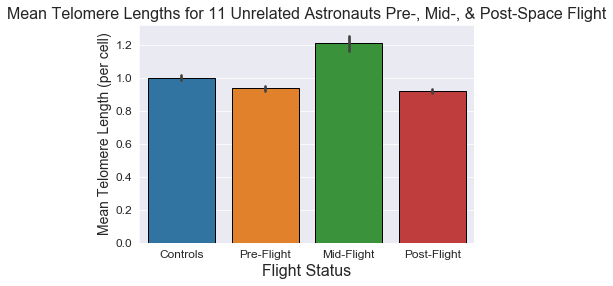

In [105]:
ax = sns.barplot(x='flight status', y='telo data per cell', data=concat_astros_ctrl_per_cell, 
            order=['Controls', 'Pre-Flight', 'Mid-Flight', 'Post-Flight'])

ax.set_title('Mean Telomere Lengths for 11 Unrelated Astronauts Pre-, Mid-, & Post-Space Flight', fontsize=16)
ax.set_xlabel('Flight Status', fontsize=16)
ax.set_ylabel('Mean Telomere Length (per cell)', fontsize=14)

In [118]:
# one-way anova between mean telomere lengths per timepoint

df1 = astro_telos_per_cell_df

pre_flight = df1[df1['flight status'] == 'Pre-Flight']['telo data per cell']
mid_flight = df1[df1['flight status'] == 'Mid-Flight']['telo data per cell']
post_flight = df1[df1['flight status'] == 'Post-Flight']['telo data per cell']
                      
print(stats.f_oneway(pre_flight, mid_flight, post_flight))
sp.posthoc_ttest(df1, val_col='telo data per cell', group_col='flight status', p_adjust='holm')

F_onewayResult(statistic=95.22257773598575, pvalue=1.8245401312740491e-40)


Pre-Flight    Mid-Flight   Post-Flight
Pre-Flight  -1.000000e+00  6.693194e-34  1.628171e-01
Mid-Flight   6.693194e-34 -1.000000e+00  6.606443e-38
Post-Flight  1.628171e-01  6.606443e-38 -1.000000e+00

Mean telomere length increases as a function of spaceflight. Furthermore, mean telomere length for astronauts overall appears to be slightly shorter after spaceflight.. Let's see what telomere length looks like for just our astronauts w/ inflight data

## Mean Telomere Lengths for 3 Astros: Visualizations, Stats

In [125]:
only_inflight_astros_df = (astro_telos_per_cell_df[astro_telos_per_cell_df
                                                   ['astro id'].isin(['2171', '1536', '5163'])].copy())

In [109]:
only_inflight_concat_astros_ctrl_per_cell = pd.concat([only_inflight_astros_df.assign(dataset='set1'),
    ctrl_telos_per_cell_df.assign(dataset='set2')], sort=False)

Text(0, 0.5, 'Mean Telomere Length (per cell)')

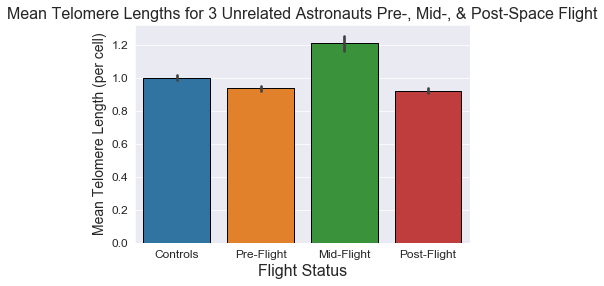

In [110]:
ax = sns.barplot(x='flight status', y='telo data per cell', data=concat_astros_ctrl_per_cell, 
            order=['Controls', 'Pre-Flight', 'Mid-Flight', 'Post-Flight'])

ax.set_title('Mean Telomere Lengths for 3 Unrelated Astronauts Pre-, Mid-, & Post-Space Flight', fontsize=16)
ax.set_xlabel('Flight Status', fontsize=16)
ax.set_ylabel('Mean Telomere Length (per cell)', fontsize=14)

In [117]:
# one-way anova between mean telomere lengths per timepoint

df2 = only_inflight_astros_df

pre_flight = df2[df2['flight status'] == 'Pre-Flight']['telo data per cell']
mid_flight = df2[df2['flight status'] == 'Mid-Flight']['telo data per cell']
post_flight = df2[df2['flight status'] == 'Post-Flight']['telo data per cell']
                      
print(stats.f_oneway(pre_flight, mid_flight, post_flight))
sp.posthoc_ttest(df2, val_col='telo data per cell', group_col='flight status', p_adjust='holm')

F_onewayResult(statistic=45.99020079452758, pvalue=1.993327036886486e-19)


Pre-Flight    Mid-Flight   Post-Flight
Pre-Flight  -1.000000e+00  8.546930e-13  3.601055e-01
Mid-Flight   8.546930e-13 -1.000000e+00  2.204878e-15
Post-Flight  3.601055e-01  2.204878e-15 -1.000000e+00

These 3 astronauts are our only individuals w/ inflight data, so the mid-flight mean telomere length has remained the same. The pre-/post-flight data has the same relationship compared to the data for all 11 astronauts: post-flight mean telomere length is *slightly* shorter.

Now.. our inflight astronauts had blood samples collected at different flight days. Let's first parse out the mean telomere length data per astronaut.

### Examining Mean Telomere Length @ Mid-Flight 1 vs. 2

Text(0.5, 1.0, 'Mean Telomere Lengths per Astronaut for 3 Unrelated Astronauts: Pre-, Mid-, Post-Flight')

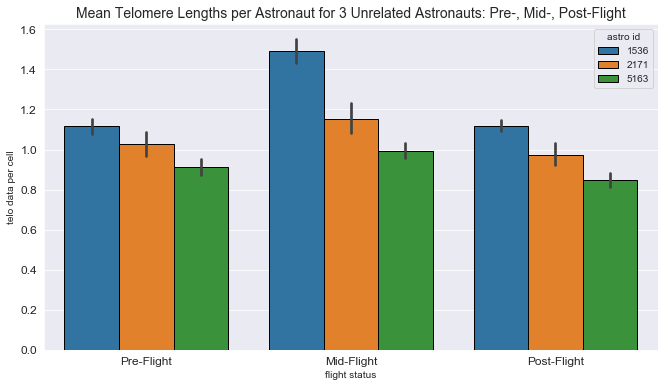

In [122]:
fig = plt.figure(figsize=(11,6))
ax = sns.barplot(x='flight status', y='telo data per cell', order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'], 
                   hue='astro id', data=only_inflight_astros_df, dodge=True)

ax.set_title('Mean Telomere Lengths per Astronaut for 3 Unrelated Astronauts: Pre-, Mid-, Post-Flight', fontsize=14)

Even when considered separately, for each astronaut the average of mean telomere length for their samples taken midflight was always longer than the average of samples pre-flight. As well, the average of mean telomere length for samples post-flight were slightly shorter. Interestingly, dso2171 looks to have similar mean telomere length for both blood draws.

Now we must consider if mean telomere length increases as a function of *duration in spaceflight*. We can do so b.c astros 1536&5163 samples were collected at FD90 & 140, while astro 2171 samples were collected at FD45 & 260. Let's first parse out the two mid-flight timepoints, then examine mid 1 & mid 2 for each astronaut

In [149]:
only_inflight_astros_df['flight status mid split'] = only_inflight_astros_df.loc[:, 'timepoint'].apply(lambda row: telo_ma.mid_split(row))
ctrl_telos_per_cell_df['flight status mid split'] = 'Controls'

In [150]:
only_inflight_concat_df = pd.concat([only_inflight_astros_df.assign(dataset='set1'),
                                     ctrl_telos_per_cell_df.assign(dataset='set2')], sort=False)

Text(0.5, 1.0, 'Mean Telomere Lengths for 3 Unrelated Astronauts: Pre-, Mid 1-, Mid 2-, Post-Flight')

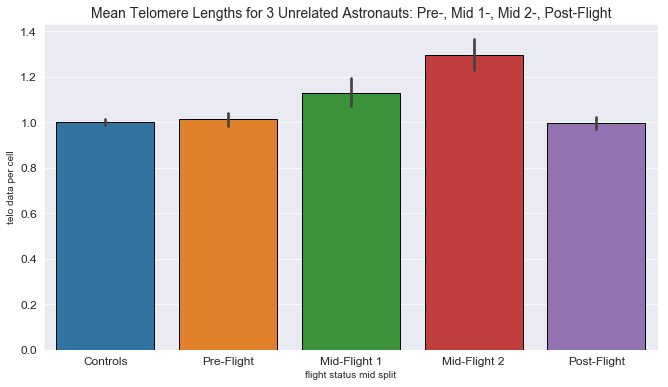

In [148]:
fig = plt.figure(figsize=(11,6))
ax = sns.barplot(x='flight status mid split', y='telo data per cell', 
                   order=['Controls', 'Pre-Flight', 'Mid-Flight 1', 'Mid-Flight 2', 'Post-Flight'], 
                 data=only_inflight_concat_df)

ax.set_title('Mean Telomere Lengths for 3 Unrelated Astronauts: Pre-, Mid 1-, Mid 2-, Post-Flight', fontsize=14)

The average of mean telomere lengths for mid-flight 2 is certainly higher than for mid-flight 1. There may be some relationship between telomere lengthening and spaceflight duration. However, telomere length may have a normal biological upper bound, though numerically undefined, thus it's unlikely that telomere length would increase indefinitely via spaceflight. Let's see how the data looks per astronaut.

Text(0.5, 1.0, 'Mean Telomere Lengths per Astronaut for 3 Unrelated Astronauts: Pre-, Mid 1-, Mid 2-, Post-Flight')

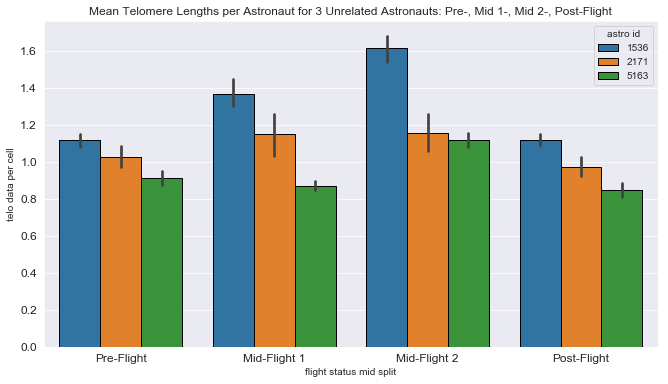

In [160]:
fig = plt.figure(figsize=(11,6))
ax = sns.barplot(x='flight status mid split', y='telo data per cell', order=['Pre-Flight', 'Mid-Flight 1', 'Mid-Flight 2', 'Post-Flight'], 
                   hue='astro id', data=only_inflight_astros_df, dodge=True)

ax.set_title('Mean Telomere Lengths per Astronaut for 3 Unrelated Astronauts: Pre-, Mid 1-, Mid 2-, Post-Flight')

Astros 1536 & 5163 blood draws occured at FD90 & FD140, and both experienced an increase in mean telomere length at mid-flight 1 relative to pre-flight, and experienced an additional increase over mid-flight 1 at mid-flight 2.

Astro 2171 had blood draws at FD45 & FD260, and while mid-flight 1 had increased mean telomere length relative to pre-flight, mid-flight 2 was not. Rather, mid-flight 2 was numerically close to mid-flight 1. Altogether, mean telomere length does not appear to increase indefinitely with spaceflight. Our limited # of datapoints suggest that while mean telomere length increases mid-flight, it does not increase indefinitely.

Let's look at individual telomere lengths.

## Analyzing Individual Telomere Length Distributions (FISH)

### Reading in individual telomere length data

In [154]:
exploded_telos_astro_df = pd.read_csv('../data/compiled and processed data/exploded_telos_astros_df.csv')
exploded_telos_astro_df['astro id'] = exploded_telos_astro_df['astro id'].astype('str')

exploded_telos_astro_df.head(4)

astro number astro id timepoint flight status  telo means  \
0             1     5163     L-270    Pre-Flight   87.672120   
1             1     5163     L-180    Pre-Flight  101.077756   
2             1     5163      L-60    Pre-Flight  128.599235   
3             1     5163      FD90    Mid-Flight  101.183129   

   telo data exploded  
0           80.905446  
1           61.777481  
2          133.745406  
3           74.323421

In [161]:
# taking only midflight astros
exploded_telos_only_mid_astros_df = exploded_telos_astro_df[
                              (exploded_telos_astro_df['astro id'] == '5163') |
                              (exploded_telos_astro_df['astro id'] == '1536') |
                              (exploded_telos_astro_df['astro id'] == '2171')].copy()

exploded_telos_only_mid_astros_df.shape

(132480, 6)

In [162]:
exploded_telos_only_mid_astros_df['flight status mid split'] = exploded_telos_only_mid_astros_df['timepoint'].apply(lambda row: telo_ma.mid_split(row))

We've seen that mean telomere length increases during spaceflight. Now let us define short&long telomeres and visualize individual telomere length distributions per astronaut for timepoints most distal to spaceflight. 

To define short & long telomeres, we'll first find the earliest pre-flight samples for each astronaut. Then, in the individual telomere length distribution for that sample, we'll find the quartile boundary values for the bottom 25% of telos (short telos), middle 50%, and top 25% (long telos). The short, medium, and long telomeres will be colored yellow, blue, and pink respectively.

Once the quartile boundary values are established by the earliest pre-flight timepoint, the quartile boundary values will be used to color both midflight samples and the latest post-flight sample. In doing so, we can visualize and quantify the shifts of short/mid/long telomeres for each sample relative to the earliest timepoint. Now we have a means to discuss these classes of telomeres.

### Graphing Individual Telo Distributions 3 Inflight Astros

In [11]:
import importlib
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

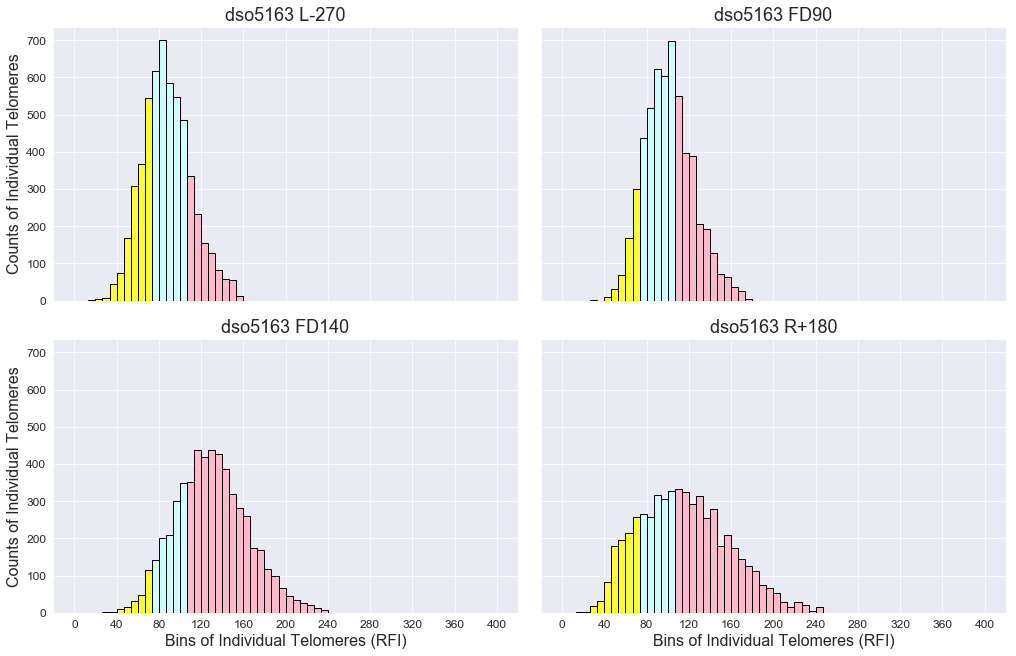

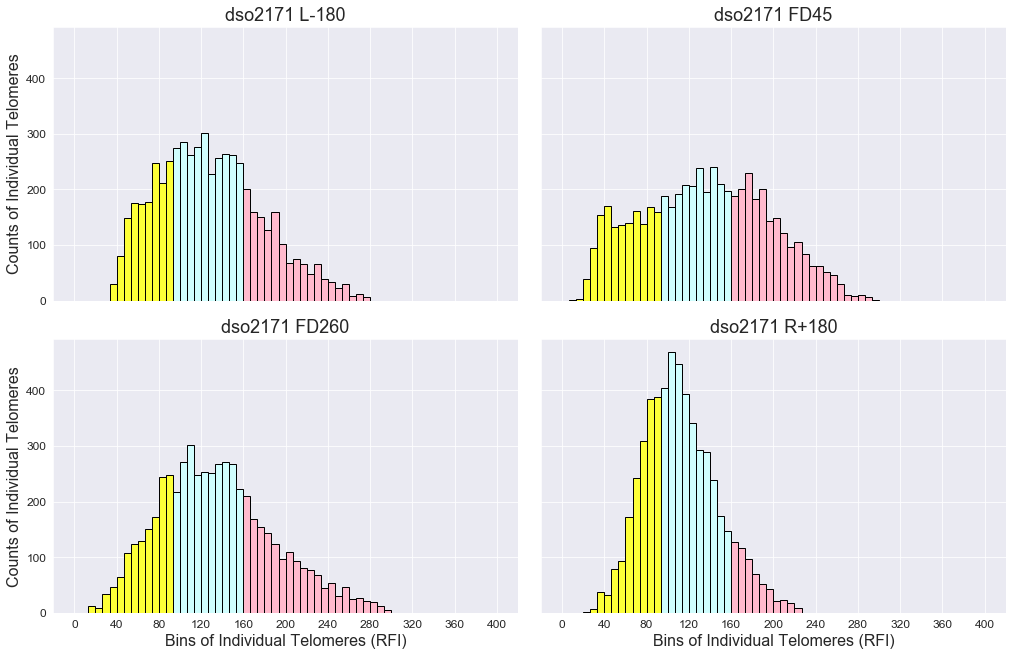

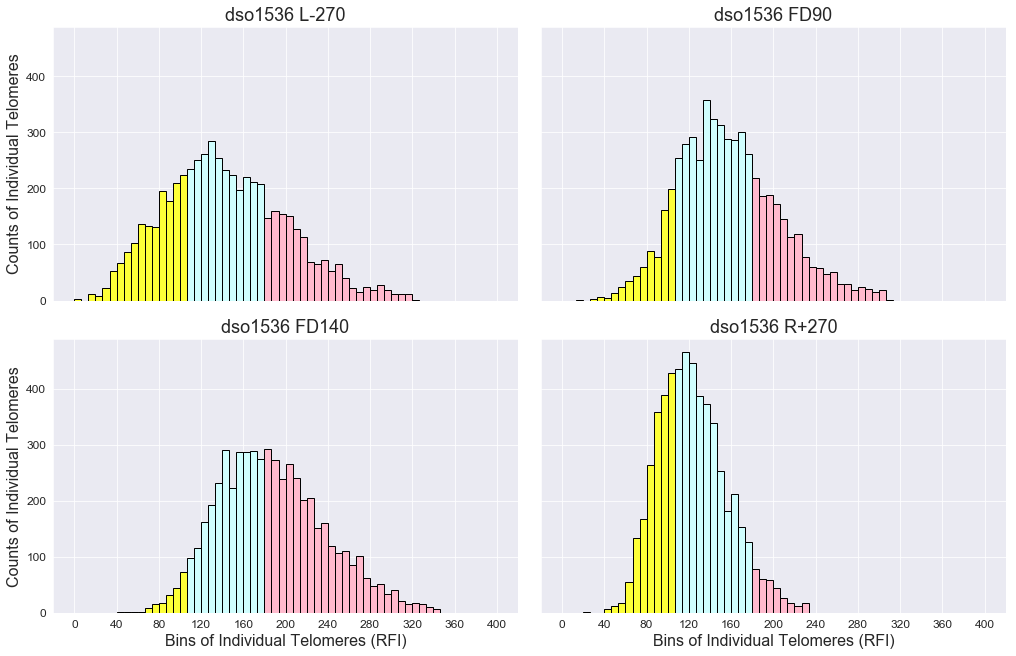

In [157]:
exploded_telos_only_mid_astros_df['astro id'] = exploded_telos_only_mid_astros_df['astro id'].astype('str')
telo_ma.make_histograms_colored_by_quartile_for_astronauts(exploded_telos_only_mid_astros_df)

In [231]:
dso2171_expl = exploded_telos_only_mid_astros_df[exploded_telos_only_mid_astros_df['astro id'] == '2171']

In [259]:
# parsing out astronaut individual telomere length data for analyses of changing distributions

dict_exploded_telos = {}

for astro_id in ['2171', '1536', '5163']:
    timepoints = []  
    
    if astro_id == '2171':    
        for timepoint in ['L-180', 'FD45', 'FD260', 'R+180']:
            exploded_telos_timepoint = dso2171_expl[dso2171_expl['timepoint'] == timepoint]['telo data exploded']
            timepoints.append([timepoint, exploded_telos_timepoint])
        dict_exploded_telos[astro_id] = timepoints
        
    elif astro_id =='1536':
        for timepoint in ['L-270', 'FD90', 'FD140', 'R+270']:
            exploded_telos_timepoint = dso2171_expl[dso2171_expl['timepoint'] == timepoint]['telo data exploded']
            timepoints.append([timepoint, exploded_telos_timepoint])
        dict_exploded_telos[astro_id] = timepoints
    
    elif astro_id =='5163':
        for timepoint in ['L-270', 'FD90', 'FD140', 'R+180']:
            exploded_telos_timepoint = dso2171_expl[dso2171_expl['timepoint'] == timepoint]['telo data exploded']
            timepoints.append([timepoint, exploded_telos_timepoint])
        dict_exploded_telos[astro_id] = timepoints

In [255]:
# {'2171' : [['L-270', 'individual telos'], ['FD45', 'individual telos'],]
# etc.

In [260]:
for key, value in dict_exploded_telos.items():
    astro_prename = dict_exploded_telos[key][0][0]
    astro_pre = dict_exploded_telos[key][0][1]
    
    astro_mid1name = dict_exploded_telos[key][1][0]
    astro_mid1 = dict_exploded_telos[key][1][1]
    
    astro_mid2name = dict_exploded_telos[key][2][0]
    astro_mid2 = dict_exploded_telos[key][2][1]
    
    astro_postname = dict_exploded_telos[key][3][0]
    astro_post =dict_exploded_telos[key][3][1]
    print(f'ASTRONAUT ID: {key}')

    telo_ma.statistics_between_timepoints(astro_pre, astro_mid1, astro_mid2, astro_post, 
        astro_prename, astro_mid1name, astro_mid2name, astro_postname)

ASTRONAUT ID: 2171
L-180  vs  FD45 MannwhitneyuResult(statistic=14028493.0, pvalue=2.8618244221912324e-13) 
 L-180  vs  FD260 MannwhitneyuResult(statistic=14225206.0, pvalue=8.093940362264684e-10) 
 FD45  vs  R+180 MannwhitneyuResult(statistic=11553652.0, pvalue=1.8925578259161497e-107) 
 FD45  vs  FD260 MannwhitneyuResult(statistic=14948962.5, pvalue=0.043677723748544915) 
 FD260  vs  R+180 MannwhitneyuResult(statistic=11514018.0, pvalue=9.99749849745642e-110) 
 L-180  vs  R+180 MannwhitneyuResult(statistic=12566804.5, pvalue=1.763372117035761e-57) 

ASTRONAUT ID: 1536
L-270  vs  FD90 MannwhitneyuResult(statistic=0.0, pvalue=0.0) 
 L-270  vs  FD140 MannwhitneyuResult(statistic=0.0, pvalue=0.0) 
 FD90  vs  R+270 MannwhitneyuResult(statistic=0.0, pvalue=0.0) 
 FD90  vs  FD140 MannwhitneyuResult(statistic=0.0, pvalue=0.0) 
 FD140  vs  R+270 MannwhitneyuResult(statistic=0.0, pvalue=0.0) 
 L-270  vs  R+270 MannwhitneyuResult(statistic=0.0, pvalue=0.0) 

ASTRONAUT ID: 5163
L-270  vs  FD90 M

Intriguingly, we see a *decrease* in short telos and an *increase* in long telos inflight. Furthermore, 2/3 astronauts experienced a remarkable increase in short telomeres post-flight. Now, let us quantify and visualize the #s of short/medium/long telomeres for the complete timecourse for these 3 unrelated astronauts.

### Counting individual short/long telos per quartile

In [166]:
melted_quartiles_astro_df = pd.read_csv('../data/compiled and processed data/melted_quartiles_astro_df.csv')

In [207]:
melted_quartiles_astro_df['astro id'] = melted_quartiles_astro_df['astro id'].astype('str')
melted_quartiles_astro_df.head(4)

astro number astro id timepoint flight status  \
0             1     5163     L-270    Pre-Flight   
1             1     5163     L-180    Pre-Flight   
2             1     5163      L-60    Pre-Flight   
3             1     5163      FD90    Mid-Flight   

                                           telo data  telo means relative Q  \
0  [80.90544604076177, 73.52155028399599, 91.6471...   87.672120         Q1   
1  [61.777480788506516, 68.55997327096559, 190.51...  101.077756         Q1   
2  [133.74540594721014, 48.34614099565653, 132.52...  128.599235         Q1   
3  [74.32342131640495, 75.1252923488139, 92.48245...  101.183129         Q1   

   Q freq counts  
0           1384  
1            848  
2            259  
3            472

In [210]:
# inflight astros w/ timepoints graphed above
df_m = melted_quartiles_astro_df.copy()

dso2171_quartiles = df_m[(df_m['astro id'] == '2171') &
                         (df_m['timepoint'].isin(['L-180', 'FD45', 'FD260', 'R+180']))]

dso1536_quartiles = df_m[(df_m['astro id'] == '1536') &
                         (df_m['timepoint'].isin(['L-270', 'FD90', 'FD140', 'R+270']))]

dso5163_quartiles = df_m[(df_m['astro id'] == '5163') &
                         (df_m['timepoint'].isin(['L-270', 'FD90', 'FD140', 'R+180']))]

mid_only_quartiles_df = pd.concat([dso2171_quartiles, dso1536_quartiles, dso5163_quartiles])

In [206]:
# inflight astros w/ only timepoints most distal to spaceflight

# mid_only_quartiles_df = (melted_quartiles_astro_df[melted_quartiles_astro_df['astro id']
#                                                    .isin(['5163', '1536', '2171'])])
                                                                
# distal_mid_only_quartiles_df = (mid_only_quartiles_df[~mid_only_quartiles_df['timepoint']
#                                                      .isin(['L-60', 'R+60', 'R+7', 'R+5' ])])
                           
# distal_mid_only_quartiles_df

Text(0, 0.5, 'Individual Telos Freqs Within first time point Quartiles')

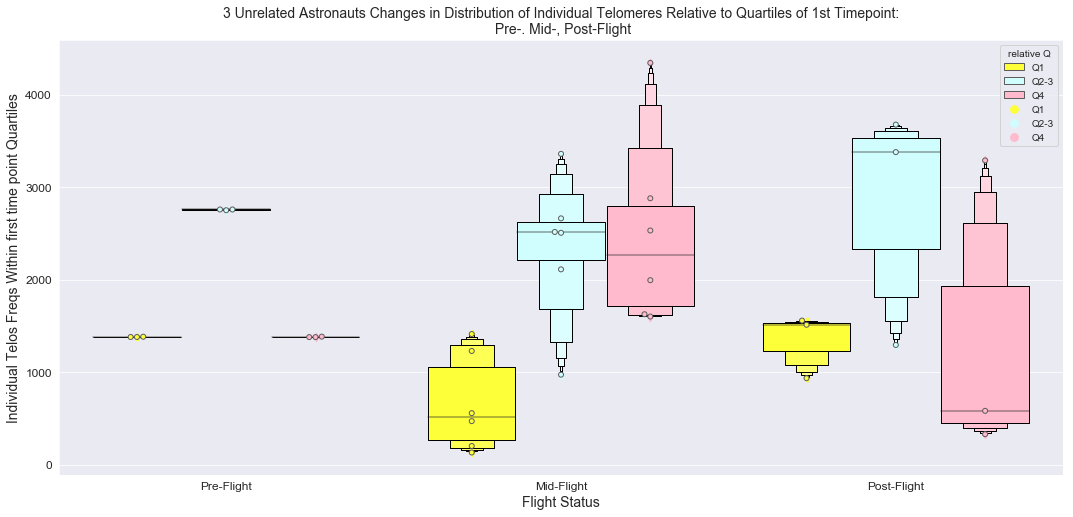

In [185]:
fig = plt.figure(figsize=(18,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

ax = sns.boxenplot(x='flight status', y='Q freq counts', hue='relative Q', data=mid_only_quartiles_df, palette=palette,
             linewidth=2, saturation=5, color="black")
ax = sns.swarmplot(x='flight status', y='Q freq counts', hue='relative Q', data=mid_only_quartiles_df, palette=palette,
             linewidth=1, color="black", dodge=True)

ax=fig.gca()
ax.set_title('3 Unrelated Astronauts Changes in Distribution of Individual Telomeres Relative to Quartiles of 1st Timepoint:\n Pre-. Mid-, Post-Flight', fontsize=14)
ax.set_xlabel('Flight Status', fontsize=14)
ax.set_ylabel('Individual Telos Freqs Within first time point Quartiles', fontsize=14)

In [211]:
mid_only_quartiles_df['flight status mid split'] = (mid_only_quartiles_df['timepoint']
                                                        .apply(lambda row: telo_ma.mid_split(row)))

Text(0, 0.5, 'Individual Telos Freqs Within first time point Quartiles')

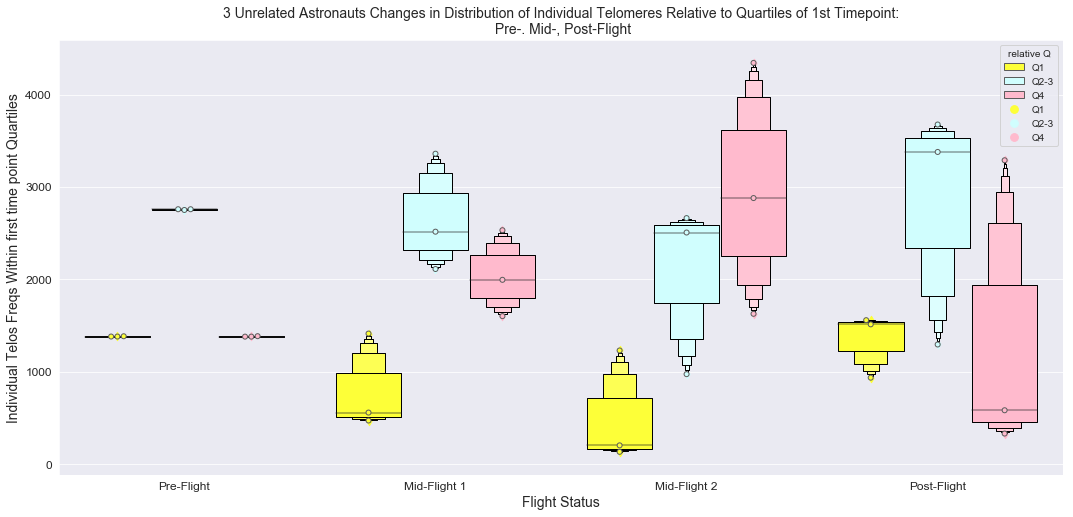

In [212]:
fig = plt.figure(figsize=(18,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

ax = sns.boxenplot(x='flight status mid split', y='Q freq counts', hue='relative Q', data=mid_only_quartiles_df, palette=palette,
             linewidth=2, saturation=5, color="black")
ax = sns.swarmplot(x='flight status mid split', y='Q freq counts', hue='relative Q', data=mid_only_quartiles_df, palette=palette,
             linewidth=1, color="black", dodge=True)

ax=fig.gca()
ax.set_title('3 Unrelated Astronauts Changes in Distribution of Individual Telomeres Relative to Quartiles of 1st Timepoint:\n Pre-. Mid-, Post-Flight', fontsize=14)
ax.set_xlabel('Flight Status', fontsize=14)
ax.set_ylabel('Individual Telos Freqs Within first time point Quartiles', fontsize=14)

In [ ]:
%reload_ext autoreload

In [ ]:
telo_ma.make_histograms_colored_by_quartile_for_astronauts(exploded_telos_astro_df)

### Making all controls individual telomere length histogram

In [214]:
all_controls_df = pd.read_csv('../data/compiled data/All_astro_controls_telomere_length_dataframe.csv')
all_controls_df['telo data'] = all_controls_df['telo data'].apply(lambda row: np.array(literal_eval(row)))

all_controls_df.drop('flight status', axis=1, inplace=True)
print(all_controls_df.shape)
all_controls_df.head(4)

(67, 5)


control id timepoint flight status controls  \
0         100     L-270             Pre-Flight   
1         100     L-180             Pre-Flight   
2         100      L-60             Pre-Flight   
3         100      R+60            Post-Flight   

                                           telo data  telo means  
0  [92.36551954560642, 118.59338456398262, 97.510...  117.607812  
1  [201.0023387905112, 69.27831607083195, 59.1546...  146.984758  
2  [155.32910123621784, 169.11125960574674, 108.3...  105.302926  
3  [160.67490811894422, 140.77848312729702, 149.9...  153.332934

In [215]:
explode_ctrl_telos_raw = all_controls_df['telo data'].apply(pd.Series)
exploded_telos_control_df = (explode_ctrl_telos_raw

    .merge(all_controls_df, right_index = True, left_index = True)                  
    .drop('telo data', axis=1)
    .melt(id_vars = ['control id', 'timepoint', 'flight status controls', 'telo means'], value_name = "telo data exploded") 
    .drop("variable", axis = 1)
    .dropna())

exploded_telos_control_df.shape

(369840, 5)

In [218]:
exploded_telos_control_df = exploded_telos_control_df[(exploded_telos_control_df['timepoint'] != 'R+7') &
                          (exploded_telos_control_df['timepoint'] != 'R+5')]

exploded_telos_control_df['flight status controls'].value_counts()

Pre-Flight     160080
Post-Flight    143520
Mid-Flight      16560
Name: flight status controls, dtype: int64

In [219]:
quartile_reference = exploded_telos_control_df[exploded_telos_control_df['flight status controls'] == 'Pre-Flight']['telo data exploded']
pre_f = exploded_telos_control_df[exploded_telos_control_df['flight status controls'] == 'Pre-Flight']['telo data exploded']
post_f = exploded_telos_control_df[exploded_telos_control_df['flight status controls'] == 'Post-Flight']['telo data exploded']

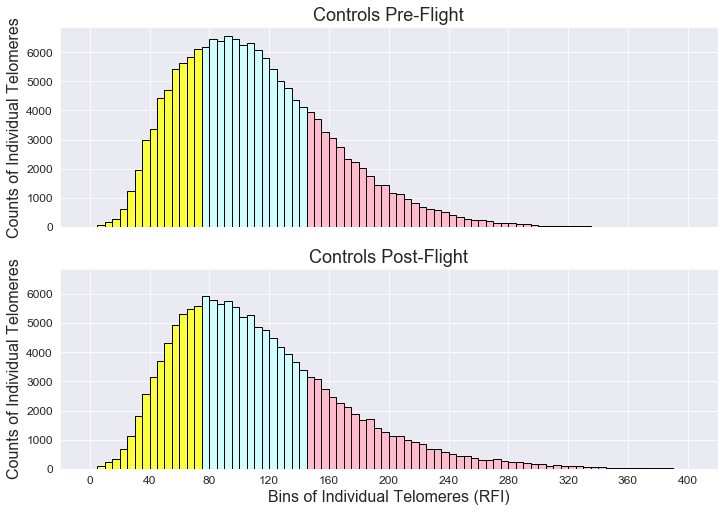

In [220]:
n_bins = 80

telo_ma.graph_two_histograms(quartile_reference, n_bins, pre_f, post_f,
                                       'Controls Pre-Flight', 'Controls Post-Flight', controls=True)

# plt.savefig(f'../individual telomere length histogram distributions/png/ALL CONTROLS histogram of individual telomere length distributions.png', dpi=600)
# plt.savefig(f'../individual telomere length histogram distributions/svg/ALL CONTROLS histogram of individual telomere length distributions.svg', format='svg', dpi=1500)

## Urine/Blood Biochemistry Data (n=11)
___

### Reading urine analyte data (n=11) & merging with telo data

In [487]:
### need to try block regression instead of plots 

# interleukins
# chemokines
# inflammatory 

In [278]:
melt_urine_biochem_data = pd.read_csv('../data/compiled and processed data/melt_urine_biochem_data.csv')
melt_urine_biochem_data.head(4)

biochemistry analyte sample type timepoint  measurement flight status  \
0      8-OHdG, Urine ug/gCr       urine       Pre      2.6 ± 1    Pre-Flight   
1    Copper, Urine umol/day       urine       Pre  0.28 ± 0.17    Pre-Flight   
2       PGF2-alpha ng/mg Cr       urine       Pre   1.84 ± 1.2    Pre-Flight   
3  Selenium, Urine umol/day       urine       Pre  1.02 ± 0.39    Pre-Flight   

   measured analyte  
0              2.60  
1              0.28  
2              1.84  
3              1.02

In [302]:
# grouping astronaut data by flight status and taking mean

trim_astro_df = astro_df.drop(['astro number', 'astro id', 'telo data per cell',], axis=1)
group_astros_telos = trim_astro_df.groupby('flight status').agg('mean').reset_index()
group_astros_telos

flight status  telo means
0    Mid-Flight    1.212613
1   Post-Flight    0.922262
2    Pre-Flight    0.938117

In [283]:
# analyes not grouped as mean, astrou telos grouped as mean
merge_urine_telos = melt_urine_biochem_data.merge(group_astros_telos, on='flight status')

In [285]:
merge_urine_telos.rename(columns={'telo means':'Mean Telomere Length'}, inplace=True)
merge_urine_telos.head(4)

biochemistry analyte sample type timepoint  measurement flight status  \
0      8-OHdG, Urine ug/gCr       urine       Pre      2.6 ± 1    Pre-Flight   
1    Copper, Urine umol/day       urine       Pre  0.28 ± 0.17    Pre-Flight   
2       PGF2-alpha ng/mg Cr       urine       Pre   1.84 ± 1.2    Pre-Flight   
3  Selenium, Urine umol/day       urine       Pre  1.02 ± 0.39    Pre-Flight   

   measured analyte  Mean Telomere Length  
0              2.60              0.938117  
1              0.28              0.938117  
2              1.84              0.938117  
3              1.02              0.938117

### Correlations between Urine Analytes & Mean Telomere Length (n=11)

In [286]:
# analytes retaining blood draw day correlated w/ mean telo length (pre, mid, post); provides more timepoints for corr

grouped_analytes = merge_urine_telos.groupby('biochemistry analyte')

for group in list(merge_urine_telos['biochemistry analyte'].unique()):
    print( f"{group}: {grouped_analytes.get_group(group).corr()['Mean Telomere Length'][0]:.4f}" ) 

8-OHdG, Urine ug/gCr: 0.7791
Copper, Urine umol/day: -0.5622
PGF2-alpha ng/mg Cr: 0.8966
Selenium, Urine umol/day: 0.8530


### Graphing urine biochemistry analyte correlations with telomere length (n=11)

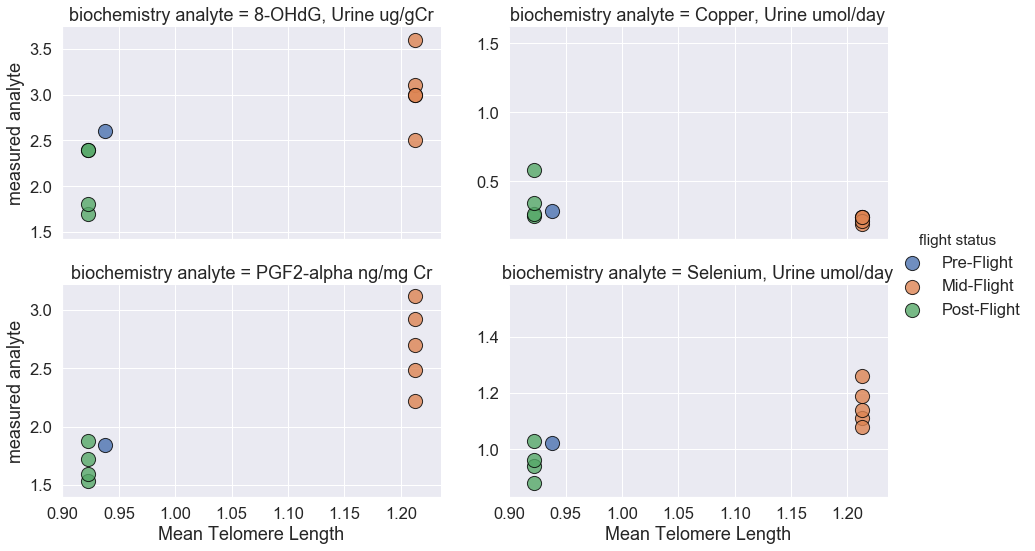

In [290]:
ax = sns.set(font_scale=1.5)
ax = sns.lmplot(x='Mean Telomere Length', y='measured analyte', hue='flight status', 
                col='biochemistry analyte', col_wrap=2,
                data=merge_urine_telos,
                sharex=True,
                sharey=False,
                fit_reg=False, scatter_kws={'s':200, 'edgecolor':'black', 'linewidth':1},
                height=4, aspect=1.6,
                hue_order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'],
          )

# ax.savefig('graph data/biochemistry correlations/scatterplot correlations urine analytes mean telomere length.png', dpi=400)

### Reading in blood analyte data (n=11) & merging with telo data

In [295]:
melt_blood_biochem_data = pd.read_csv('../data/compiled and processed data/melt_blood_biochem_data.csv')
melt_blood_biochem_data.head(4)

biochemistry analyte sample type timepoint  measurement flight status  \
0     CCL2/MCP-1 pg/ml       blood       Pre      83 ± 17    Pre-Flight   
1    CCL3/MIP-1a pg/ml       blood       Pre    438 ± 194    Pre-Flight   
2     CCL4/MIP1B pg/ml       blood       Pre      54 ± 17    Pre-Flight   
3    CCL5/RANTES pg/ml       blood       Pre  6902 ± 4393    Pre-Flight   

   measured analyte  
0              83.0  
1             438.0  
2              54.0  
3            6902.0

In [327]:
blood_n11_drop_rows_all_status = telo_ma.correlate_astro_analytes_telomeres_pipeline(analyte_df=melt_blood_biochem_data, telomere_df=astro_df, 
                                                  astro_ids_of_interest='all astros',
                                                  how_drop_missing='by melted row', 
#                                                   retain_what_flight_status=['Pre-Flight', 'Mid-Flight', 'Post-Flight'])
                                                  retain_what_flight_status='require at least one per status')
print(blood_n11_drop_rows_all_status.shape)
blood_n11_drop_rows_all_status.head(4)

(222, 7)


biochemistry analyte timepoint  measurement flight status  measured analyte  \
0     CCL2/MCP-1 pg/ml       Pre      83 ± 17    Pre-Flight              83.0   
1    CCL3/MIP-1a pg/ml       Pre    438 ± 194    Pre-Flight             438.0   
2     CCL4/MIP1B pg/ml       Pre      54 ± 17    Pre-Flight              54.0   
3    CCL5/RANTES pg/ml       Pre  6902 ± 4393    Pre-Flight            6902.0   

      astro id  Mean Telomere Length  
0  3149.730408              0.938117  
1  3149.730408              0.938117  
2  3149.730408              0.938117  
3  3149.730408              0.938117

### Correlations between Blood Analytes & Mean Telomere Length (n=11)

In [385]:
corr_value_tests = telo_ma.find_high_correlates_analytes_mean_telos(blood_n11_drop_rows_all_status, 0.75, corr_loc=0)

CCL3/MIP-1a pg/ml: 0.8940
CCL4/MIP1B pg/ml: 0.8405
CCL5/RANTES pg/ml: 0.9626
CXCL5/ENA-78 pg/ml: 0.9771
FGF Basic Immune Lab pg/ml: 0.9034
GM-CSF pg/ml: 0.8744
IL-1 beta Immune Lab pg/ml: 0.9106
IL-17 pg/ml: 0.9227
IL-1a pg/ml: 0.8215
IL-2 pg/ml: 0.8787
IL-4 pg/ml: 0.9314
IL-6 pg/ml: -0.8530
VEGF-1 Immune Lab pg/ml: 0.8626
Zinc, Serum umol/L: 0.7774


### Graphing Blood (n=11) correlations with Telomere Length

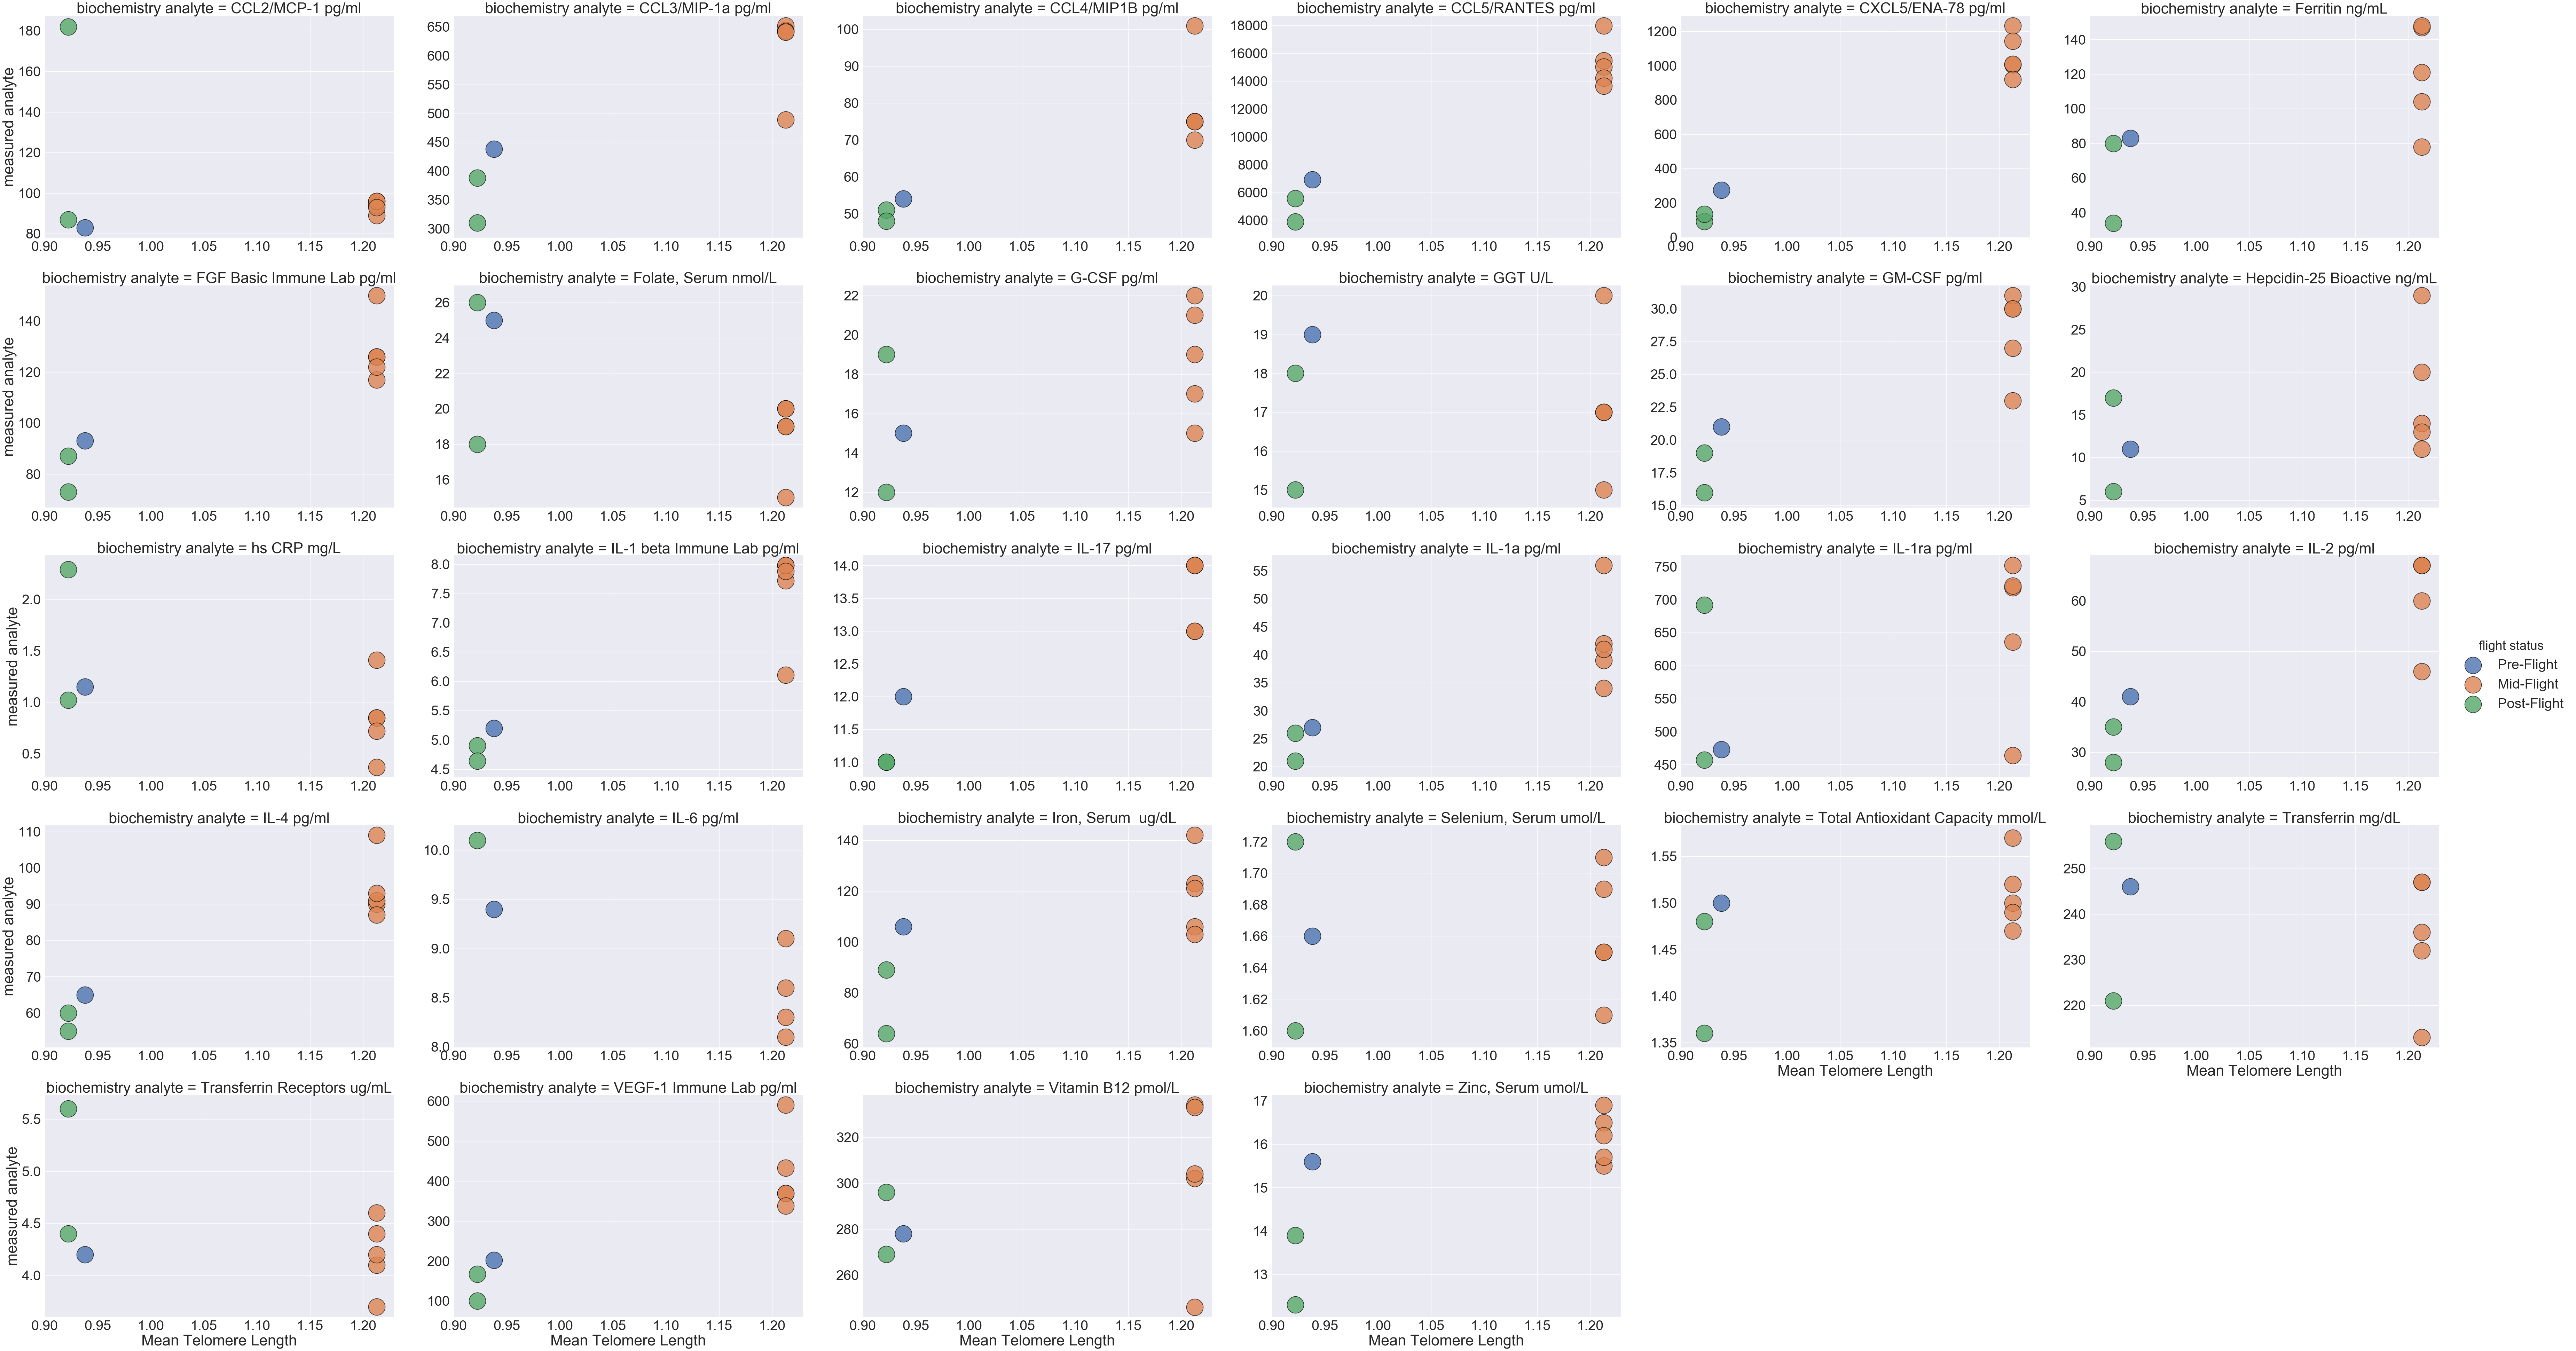

In [388]:
ax = sns.set(font_scale=3.6)
ax = sns.lmplot(x='Mean Telomere Length', y='measured analyte', hue='flight status', 
                col='biochemistry analyte', col_wrap=6,
                data=blood_n11_drop_rows_all_status,
                sharey=False,
                sharex=False,
                fit_reg=False,
                hue_order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'],
                scatter_kws={'s':2300, 'edgecolor':'black', 'linewidth':1.5},
                height=11, aspect=1.5,
          )
# plt.tight_layout()
# plt.show()
# ax.savefig('graph data/biochemistry correlations/scatterplot correlations blood analytes mean telomere length.png')

## Blood Biochemistry Data (n=4)

In [472]:
melt_blood_biochem_data_n4 = pd.read_csv('../data/compiled and processed data/melt_blood_biochem_data_n4.csv')
melt_blood_biochem_data_n4['astro id'] = melt_blood_biochem_data_n4['astro id'].astype('str')

melt_blood_biochem_data_n4.head(4)

astro id timepoint flight status biochemistry analyte  measured analyte
0     1261     L-180    Pre-Flight     CCL2/MCP-1 pg/ml             84.73
1     1261      L-45    Pre-Flight     CCL2/MCP-1 pg/ml             84.00
2     1261      L-10    Pre-Flight     CCL2/MCP-1 pg/ml             89.64
3     1261      FD15    Mid-Flight     CCL2/MCP-1 pg/ml             76.93

In [477]:
# taking mean biochemistry analytes @ each timepoint & flight status for n=4 astros
# to then compare mean of analyte @ each timepoint for all astros to mean telomere length per flight status

mean = melt_blood_biochem_data_n4.groupby(['timepoint', 'flight status', 'biochemistry analyte']).agg('mean').reset_index()
# mean

In [479]:
blood_n4_drop_rows_all_status = telo_ma.correlate_astro_analytes_telomeres_pipeline(
                                                  analyte_df=mean, 
                                                  telomere_df=astro_df, 
                                                  astro_ids_of_interest='all astros',
                                                  how_drop_missing='by melted row', 
#                                                   retain_what_flight_status=['Pre-Flight', 'Mid-Flight', 'Post-Flight'])
                                                  retain_what_flight_status='any')
print(blood_n4_drop_rows_all_status.shape)
blood_n4_drop_rows_all_status.head(4)

(444, 5)


timepoint flight status biochemistry analyte  measured analyte  \
0     FD120    Mid-Flight     CCL2/MCP-1 pg/ml           102.260   
1     FD120    Mid-Flight    CCL3/MIP-1a pg/ml           408.750   
2     FD120    Mid-Flight     CCL4/MIP1B pg/ml            40.385   
3     FD120    Mid-Flight    CCL5/RANTES pg/ml         12100.000   

   Mean Telomere Length  
0              1.212613  
1              1.212613  
2              1.212613  
3              1.212613

In [488]:
vals = telo_ma.find_high_correlates_analytes_mean_telos(blood_n4_drop_rows_all_status, 0.5, corr_loc=0, astro_ids=False)

CCL3/MIP-1a pg/ml: 0.7108
CCL4/MIP1B pg/ml: 0.6642
CCL5/RANTES pg/ml: 0.6107
CXCL5/ENA-78 pg/ml: 0.7437
CXCL8/IL-8 pg/ml: 0.7138
FGF Basic Immune Lab pg/ml: 0.7329
GM-CSF pg/ml: 0.7430
IL-1 beta Immune Lab pg/ml: 0.6835
IL-10 pg/ml: 0.8530
IL-1a pg/ml: 0.6576
IL-2 pg/ml: 0.7280
IL-4 pg/ml: 0.6762
TNFalpha Immune Lab pg/ml: 0.7161
Tpo (Thrombopoietin) Immune Lab pg/ml: 0.7823
VEGF-1 Immune Lab pg/ml: 0.7776
Folate, RBC ng/ml (w/serum folat: 0.5172
Glutathione, Total (Oxidized umol/L): 0.8278
Glutathione, Total umol/L: 0.9432
SOD U/g Hgb: 0.7069
Total Lipid Peroxides umol/L: -0.8584


### Graphing Blood (n=4) correlations with Telomere Length

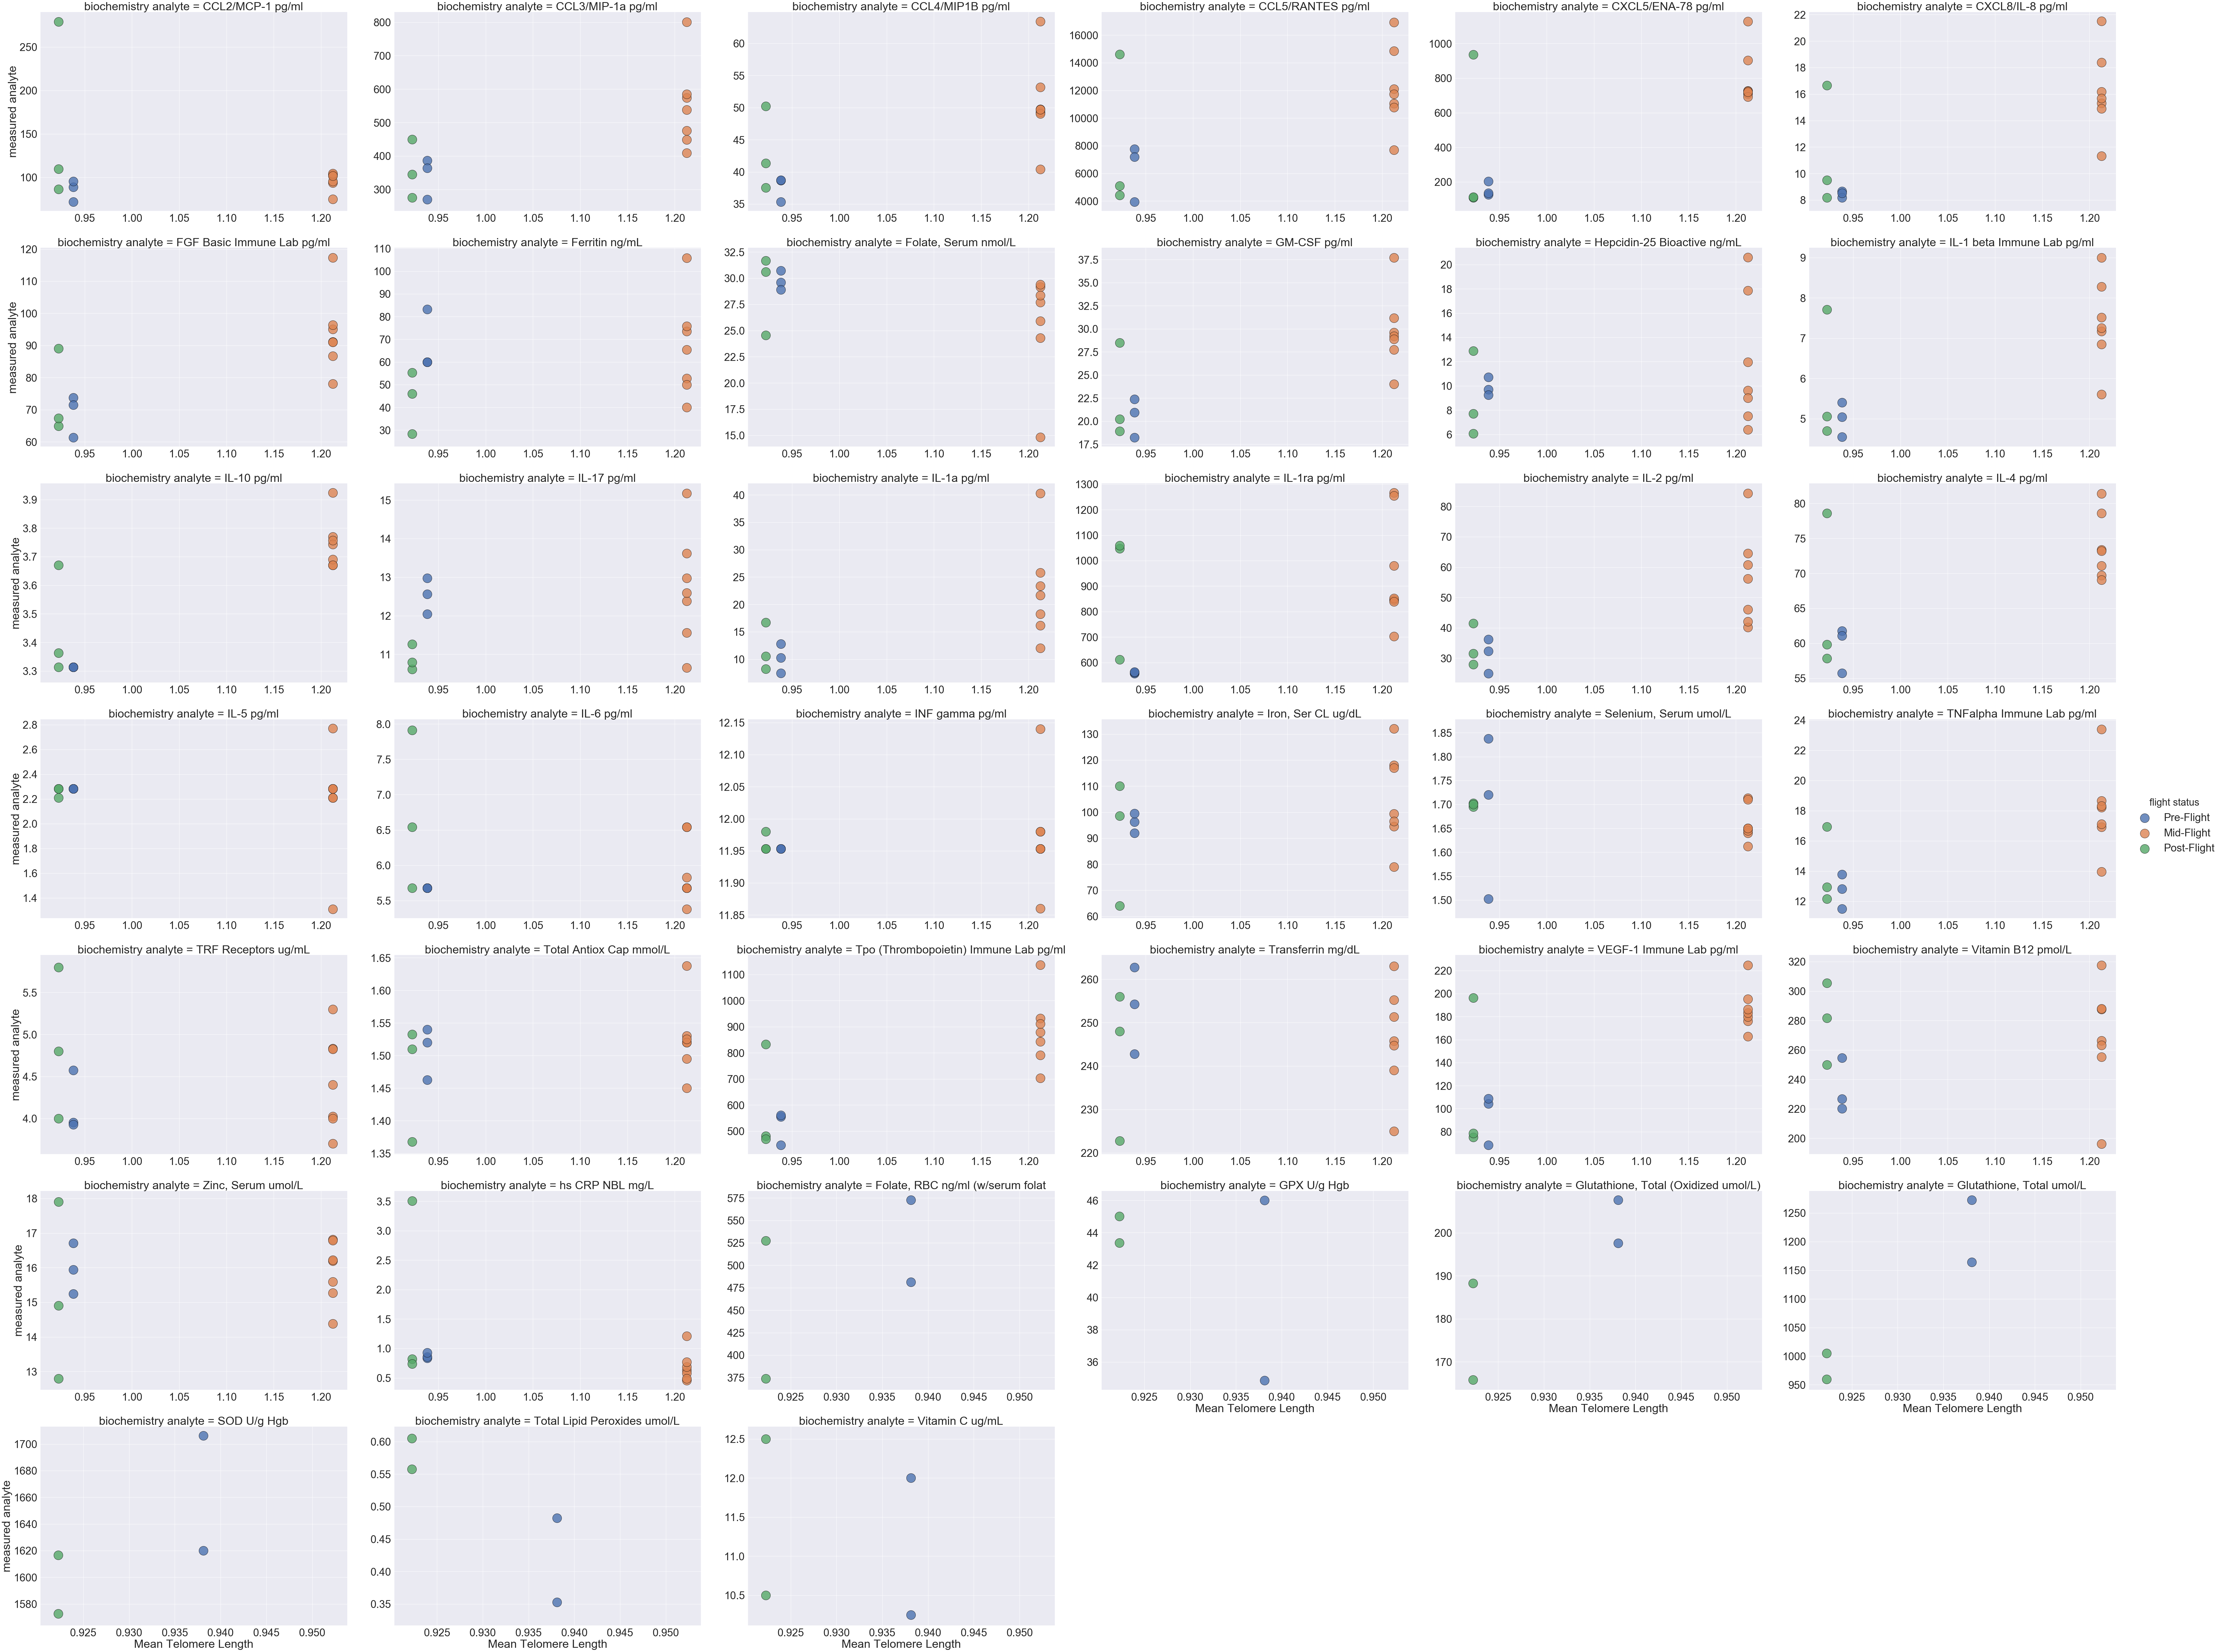

In [481]:
ax = sns.set(font_scale=3.2)
ax = sns.lmplot(x='Mean Telomere Length', y='measured analyte', hue='flight status', 
                col='biochemistry analyte', col_wrap=6,
                data=blood_n4_drop_rows_all_status,
                sharey=False,
                sharex=False,
                fit_reg=False,
                hue_order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'],
                scatter_kws={'s':900, 'edgecolor':'black', 'linewidth':1},
                height=11, aspect=1.5,
          )
# plt.tight_layout()
# plt.show()
# ax.savefig('graph data/biochemistry correlations/n=4 scatterplot correlations blood analytes mean telomere length.png')

In [484]:
# need to for loop astro id, then for loop biochem analyte

# individ_corr = 
astro_ids = list(drop_merge_blood_biochem_data_n4['astro id'].unique())
astro_id_group = drop_merge_blood_biochem_data_n4.groupby('astro id')

for astro in astro_ids:
    individ_astro_df = astro_id_group.get_group(astro)
    analyte_group_individ = individ_astro_df.groupby('biochemistry analyte')
    analytes = list(individ_astro_df['biochemistry analyte'].unique())
    
    for analyte in analytes:
        telomere_corr = analyte_group_individ.get_group(analyte).corr()['Mean Telomere Length'][0]
        
        if abs(telomere_corr) > 0.5:
            print(f"{astro} - {analyte}: {telomere_corr:.4f}")


1261 - CCL2/MCP-1 pg/ml: -0.5846
1261 - Ferritin ng/mL: 0.7912
1261 - Folate, RBC ng/ml (w/serum folat: 0.8209
1261 - Folate, Serum nmol/L: 0.9792
1261 - Glutathione, Total umol/L: 0.6928
1261 - Hepcidin-25 Bioactive ng/mL: 0.6741
1261 - IL-17 pg/ml: 0.7710
1261 - IL-1ra pg/ml: -0.6669
1261 - SOD U/g Hgb: 0.8077
1261 - Total Lipid Peroxides umol/L: -0.9771
1261 - Transferrin mg/dL: 0.5269
1261 - TRF Receptors ug/mL: -0.9734
1261 - Vitamin B12 pmol/L: -0.5290
1261 - Vitamin C ug/mL: 0.7071
1261 - Zinc, Serum umol/L: 0.8545
2171 - CCL3/MIP-1a pg/ml: 0.5890
2171 - CCL5/RANTES pg/ml: 0.6481
2171 - CXCL5/ENA-78 pg/ml: 0.7652
2171 - CXCL8/IL-8 pg/ml: 0.7370
2171 - FGF Basic Immune Lab pg/ml: 0.6579
2171 - Folate, RBC ng/ml (w/serum folat: -0.5542
2171 - Folate, Serum nmol/L: 0.5925
2171 - Glutathione, Total (Oxidized umol/L): -0.5766
2171 - GM-CSF pg/ml: 0.6856
2171 - hs CRP NBL mg/L: -0.5965
2171 - IL-1 beta Immune Lab pg/ml: 0.6702
2171 - IL-10 pg/ml: -0.5523
2171 - IL-17 pg/ml: 0.5323
217